# Week1　授業課題1　曽呂利新左エ門問題　

> 秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

### 【問題1】100日目の米粒の数    
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [3]:
# 米粒の計算
day = 100
days = []
n_rice_perday = 0
n_rice_total = 0
n_rices_perday = []
n_rices_total = []
for i in range(day):
    days.append(i+1)
    n_rice_perday = 2**i
    n_rice_total += n_rice_perday
    n_rices_perday.append(n_rice_perday)
    n_rices_total.append(n_rice_total)
print("100日目には合計 {} 粒の米を貰っている。".format(n_rices_total[-1]))

100日目には合計 1267650600228229401496703205375 粒の米を貰っている。


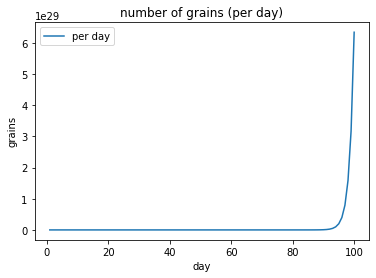

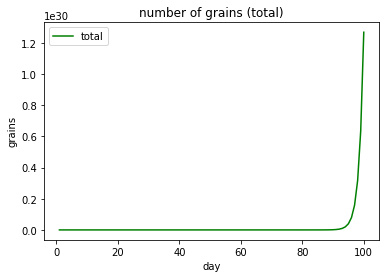

In [4]:
# 折れ線グラフに表示

#「その日にもらうコメの数」
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("number of grains (per day)")
plt.xlabel("day")
plt.ylabel("grains")
plt.plot(days, n_rices_perday, label='per day')
plt.legend()
plt.show()

#「その日までに累計でもらうコメの数」
plt.title("number of grains (total)")
plt.xlabel("day")
plt.ylabel("grains")
plt.plot(days, n_rices_total, color='green', label='total')
plt.legend()
plt.show()

### 【問題２】100日目以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。


以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [5]:
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    days = []
    n_rice_perday = 0
    n_rice_total = 0
    list_n_grains = []
    list_total_grains = []
    for i in range(day):
        days.append(i+1)
        n_rice_perday = 2**i
        n_rice_total += n_rice_perday
        list_n_grains.append(n_rice_perday)
        list_total_grains.append(n_rice_total)
    return list_n_grains, list_total_grains, days

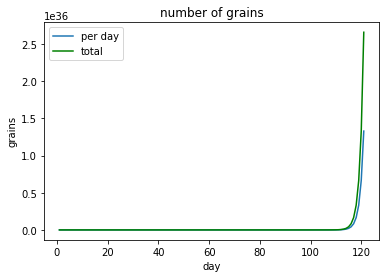

In [6]:
# コース受講期間（2020/04/01～2020/07/31）の日数を算出
import datetime
t1 = datetime.datetime(year=2020, month=4, day=1)
t2 = datetime.datetime(year=2020, month=7, day=31)
td = (t2 - t1).days

# この間貰える米粒を算出
list_n_grains, list_total_grains, days = compute_sorori_shinzaemon(td)

# グラフ表示
plt.title("number of grains")
plt.xlabel("day")
plt.ylabel("grains")
plt.plot(days, list_n_grains, label='per day')
plt.plot(days, list_total_grains, color='green', label='total')
plt.legend()
plt.show()

### 【問題3】何人が何日間生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は **米粒の数(int)** と **人数(int)** 、出力は **生活できる日数(int)** です。関数名やコメントなどは分かりやすく考えて作成してください。


ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [7]:
# 生活できる日数を計算する関数
# 茶碗一杯の米粒：約400粒
# 一人1日当たりは茶碗3杯(1200)に300足して1500粒とする
def life(n_rice, n_human):
    """
    米粒の数と人数から、これらの人々が生活できる日数を出力する関数。
    1人1日当たりに必要な米粒は1500粒とする。

    Parameteres
    --------------
    n_rice: int
        米粒の数 
    n_human: int
        人数 

    Returns
    --------------
    n_life: int
        生活できる日数 
    """
    n_life = n_rice/1500/n_human
    return int(n_life)

In [9]:
# コース期間中に貰う米粒の累計数を算出
n_rice = compute_sorori_shinzaemon(td)[1][-1]

# 機械学習エンジニアコース受講者数：13人
n_human = 13

# 上記の条件で生活できる日数を算出
n_life = life(n_rice, n_human)
print("米 約{:.2e} 粒では {} 人が 約{:2e} 日間生活できる".format(n_rice, n_human, n_life))

米 約2.66e+36 粒では 13 人が 約1.363311e+32 日間生活できる
